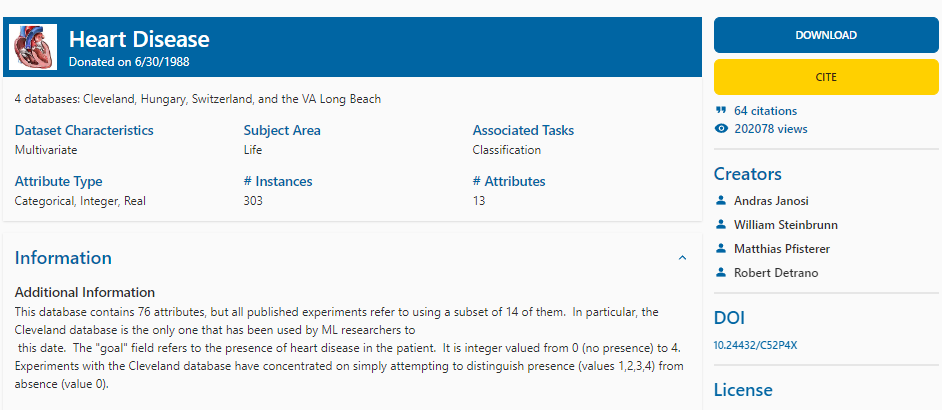

**Developers' Guide:** [Amazon Machine Learning](https://docs.aws.amazon.com/pdfs/machine-learning/latest/dg/machinelearning-dg.pdf#cross-validation) , [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

#### **Task:**   
The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

### **Dataset available on:** [UCI Machine Learning Heart Disease](https://archive.ics.uci.edu/dataset/45/heart+disease), [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification?resource=download)

### **Imports**

In [1]:
import pandas as pd # wrangling the data
from sklearn.preprocessing import MinMaxScaler # standardising the data
from sklearn.model_selection import train_test_split # split the dataset into training and test set
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # encoding the data in to numerical values from strings
from sklearn import svm, datasets  # the svm and datasets for the algorithm classifier
import matplotlib.pyplot as plt # for data visualization
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # for model evaluation
from sklearn.model_selection import GridSearchCV # cross validation and parameter tuning
from sklearn.metrics import classification_report # summary report or the metrics

### **Loading the database**

#### **Read the csv file and study the database**

In [2]:
# read the data using pandas
heartDisease = pd.read_csv('heart.csv')

#### **Basic EDA**

In [3]:
# display the first five rows using the head function
heartDisease.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# show the column names
heartDisease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# shape of the data
heartDisease.shape

(1025, 14)

In [6]:
# check for missing values
heartDisease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# show the distribution of the target variable data
heartDisease['target'].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

In [8]:
# create a copy of the dataset for visualization purpose
heartDisease_df = heartDisease.copy()
heartDisease.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

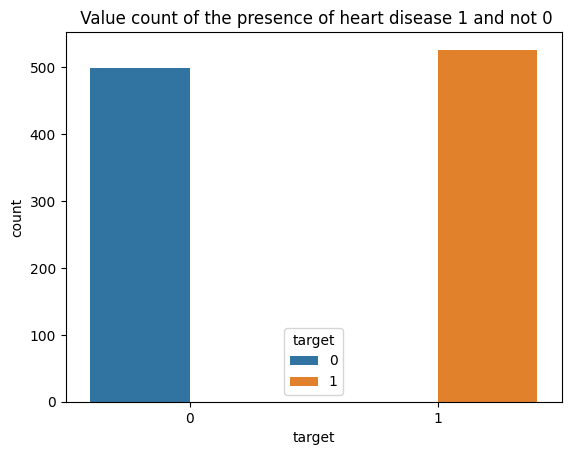

In [9]:
# import seaborn as sns
import seaborn as sns
sns.countplot(data=heartDisease, x="target", hue="target").set(title = " Value count of the presence of heart disease 1 and not 0");

## **Preprocessing:**

#### **Define the target and the inputs**

In [10]:
target = heartDisease['target'] # value to be predicted
inputs = heartDisease.drop(['target'], axis = 1 ) # drop the target column

#### **Create a training and a testing dataset**

In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs, # independent or x values
                                                    target, # dependent or x values
                                                    test_size = 0.2, # split the data into 80% training set and 20% test set
                                                    random_state = 365, # for reproducibility
                                                    stratify = target   # get a balance both in the training and test set
                                                      )

#### **Check the result from the stratification**

In [12]:
# let see the training distribution after train_test_split
y_train.value_counts()

1    421
0    399
Name: target, dtype: int64

In [13]:
# let see the testing distribution after train_test_split
y_test.value_counts()

1    105
0    100
Name: target, dtype: int64

### **Rescaling**

**In order for the SVC to work correctly the inputs need to be rescaled to the range(-1,1)**

In [14]:
scaling = MinMaxScaler().fit(x_train) # scaling the training set
x_train_rescaled = scaling.transform(x_train) # transform the scaled data

#### **Classification**

**Radial Basis Function Kernel (RBF):**

In [15]:
C = 1.0 # helps us decide how wide the margin of the classifiers are

In [16]:
svc = svm.SVC(C = 100, gamma=1, kernel='rbf').fit(x_train_rescaled, y_train) # fit the model on the x_train_rescaled, y_train

In [17]:
y_pred_test = svc.predict(scaling.transform(x_test)) # predict test transform

### **Model Evaluation:**

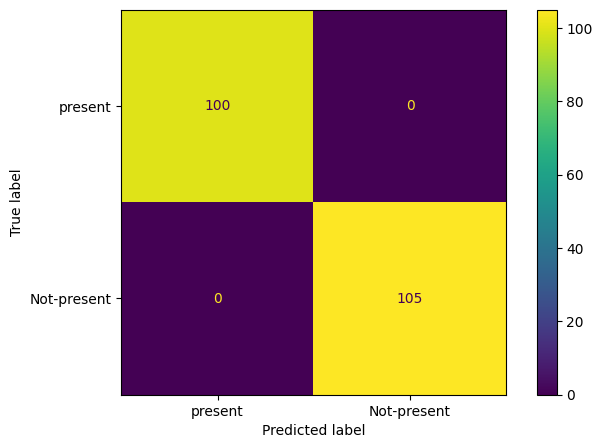

In [18]:
# display the confusionMatrix
sns.reset_orig() # to remove the seaborn visual

fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred_test),
    display_labels=['present', "Not-present"]
)

cmp.plot(ax=ax);

In [19]:
# print a summary classification_report
print(classification_report(y_test, y_pred_test, target_names = ['present', "Not-present"]))

              precision    recall  f1-score   support

     present       1.00      1.00      1.00       100
 Not-present       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



## **Now over to you find a dataset and apply the Support Vector Machine algorithm: GOOD LUCK!**